<a href="https://colab.research.google.com/github/sofiabolarin/Actividad-1/blob/main/Actividad_1_analisis_exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df=pd.read_csv("listings.csv")

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19693 entries, 0 to 19692
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19693 non-null  int64  
 1   listing_url                                   19693 non-null  object 
 2   scrape_id                                     19693 non-null  int64  
 3   last_scraped                                  19693 non-null  object 
 4   source                                        19693 non-null  object 
 5   name                                          19693 non-null  object 
 6   description                                   19665 non-null  object 
 7   neighborhood_overview                         8595 non-null   object 
 8   picture_url                                   19693 non-null  object 
 9   host_id                                       19693 non-null 

In [297]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")


df["room_type"] = df["room_type"].str.replace("Entire home/apt","1")
df["room_type"] = df["room_type"].str.replace("Hotel room","2")
df["room_type"] = df["room_type"].str.replace("Private room","3")
df["room_type"] = df["room_type"].str.replace("Shared room","4")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [298]:
df2 = df[['host_acceptance_rate','price','availability_365','number_of_reviews',
          'review_scores_rating','review_scores_cleanliness','review_scores_communication', 'room_type']]
df2.head()

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100,73.00,353,52,4.80,4.94,4.90,3
1,92,45.00,333,9,4.88,4.50,5.00,3
2,0,126.00,2,11,4.36,4.82,4.73,1
3,100,101.00,161,26,4.69,4.65,4.46,1
4,100,101.00,155,15,4.36,4.79,4.50,1


In [299]:
df2['host_acceptance_rate'] = pd.to_numeric(df2['host_acceptance_rate'],errors = 'coerce')
df2['price'] = pd.to_numeric(df2['price'],errors = 'coerce')
df2['room_type'] = pd.to_numeric(df2['room_type'],errors = 'coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19693 entries, 0 to 19692
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         18623 non-null  float64
 1   price                        19693 non-null  float64
 2   availability_365             19693 non-null  int64  
 3   number_of_reviews            19693 non-null  int64  
 4   review_scores_rating         15682 non-null  float64
 5   review_scores_cleanliness    15613 non-null  float64
 6   review_scores_communication  15611 non-null  float64
 7   room_type                    19693 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.2 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [300]:
dfn =df2.fillna(round(df.mean(),1))
dfn.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,73.0,353,52,4.80,4.94,4.90,3
1,92.0,45.0,333,9,4.88,4.50,5.00,3
2,0.0,126.0,2,11,4.36,4.82,4.73,1
3,100.0,101.0,161,26,4.69,4.65,4.46,1
4,100.0,101.0,155,15,4.36,4.79,4.50,1


In [301]:
dfn = df2.fillna(method="bfill")
dfn.head()

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,73.0,353,52,4.80,4.94,4.90,3
1,92.0,45.0,333,9,4.88,4.50,5.00,3
2,0.0,126.0,2,11,4.36,4.82,4.73,1
3,100.0,101.0,161,26,4.69,4.65,4.46,1
4,100.0,101.0,155,15,4.36,4.79,4.50,1


Text(0.5, 1.0, 'Correlation Heatmap')

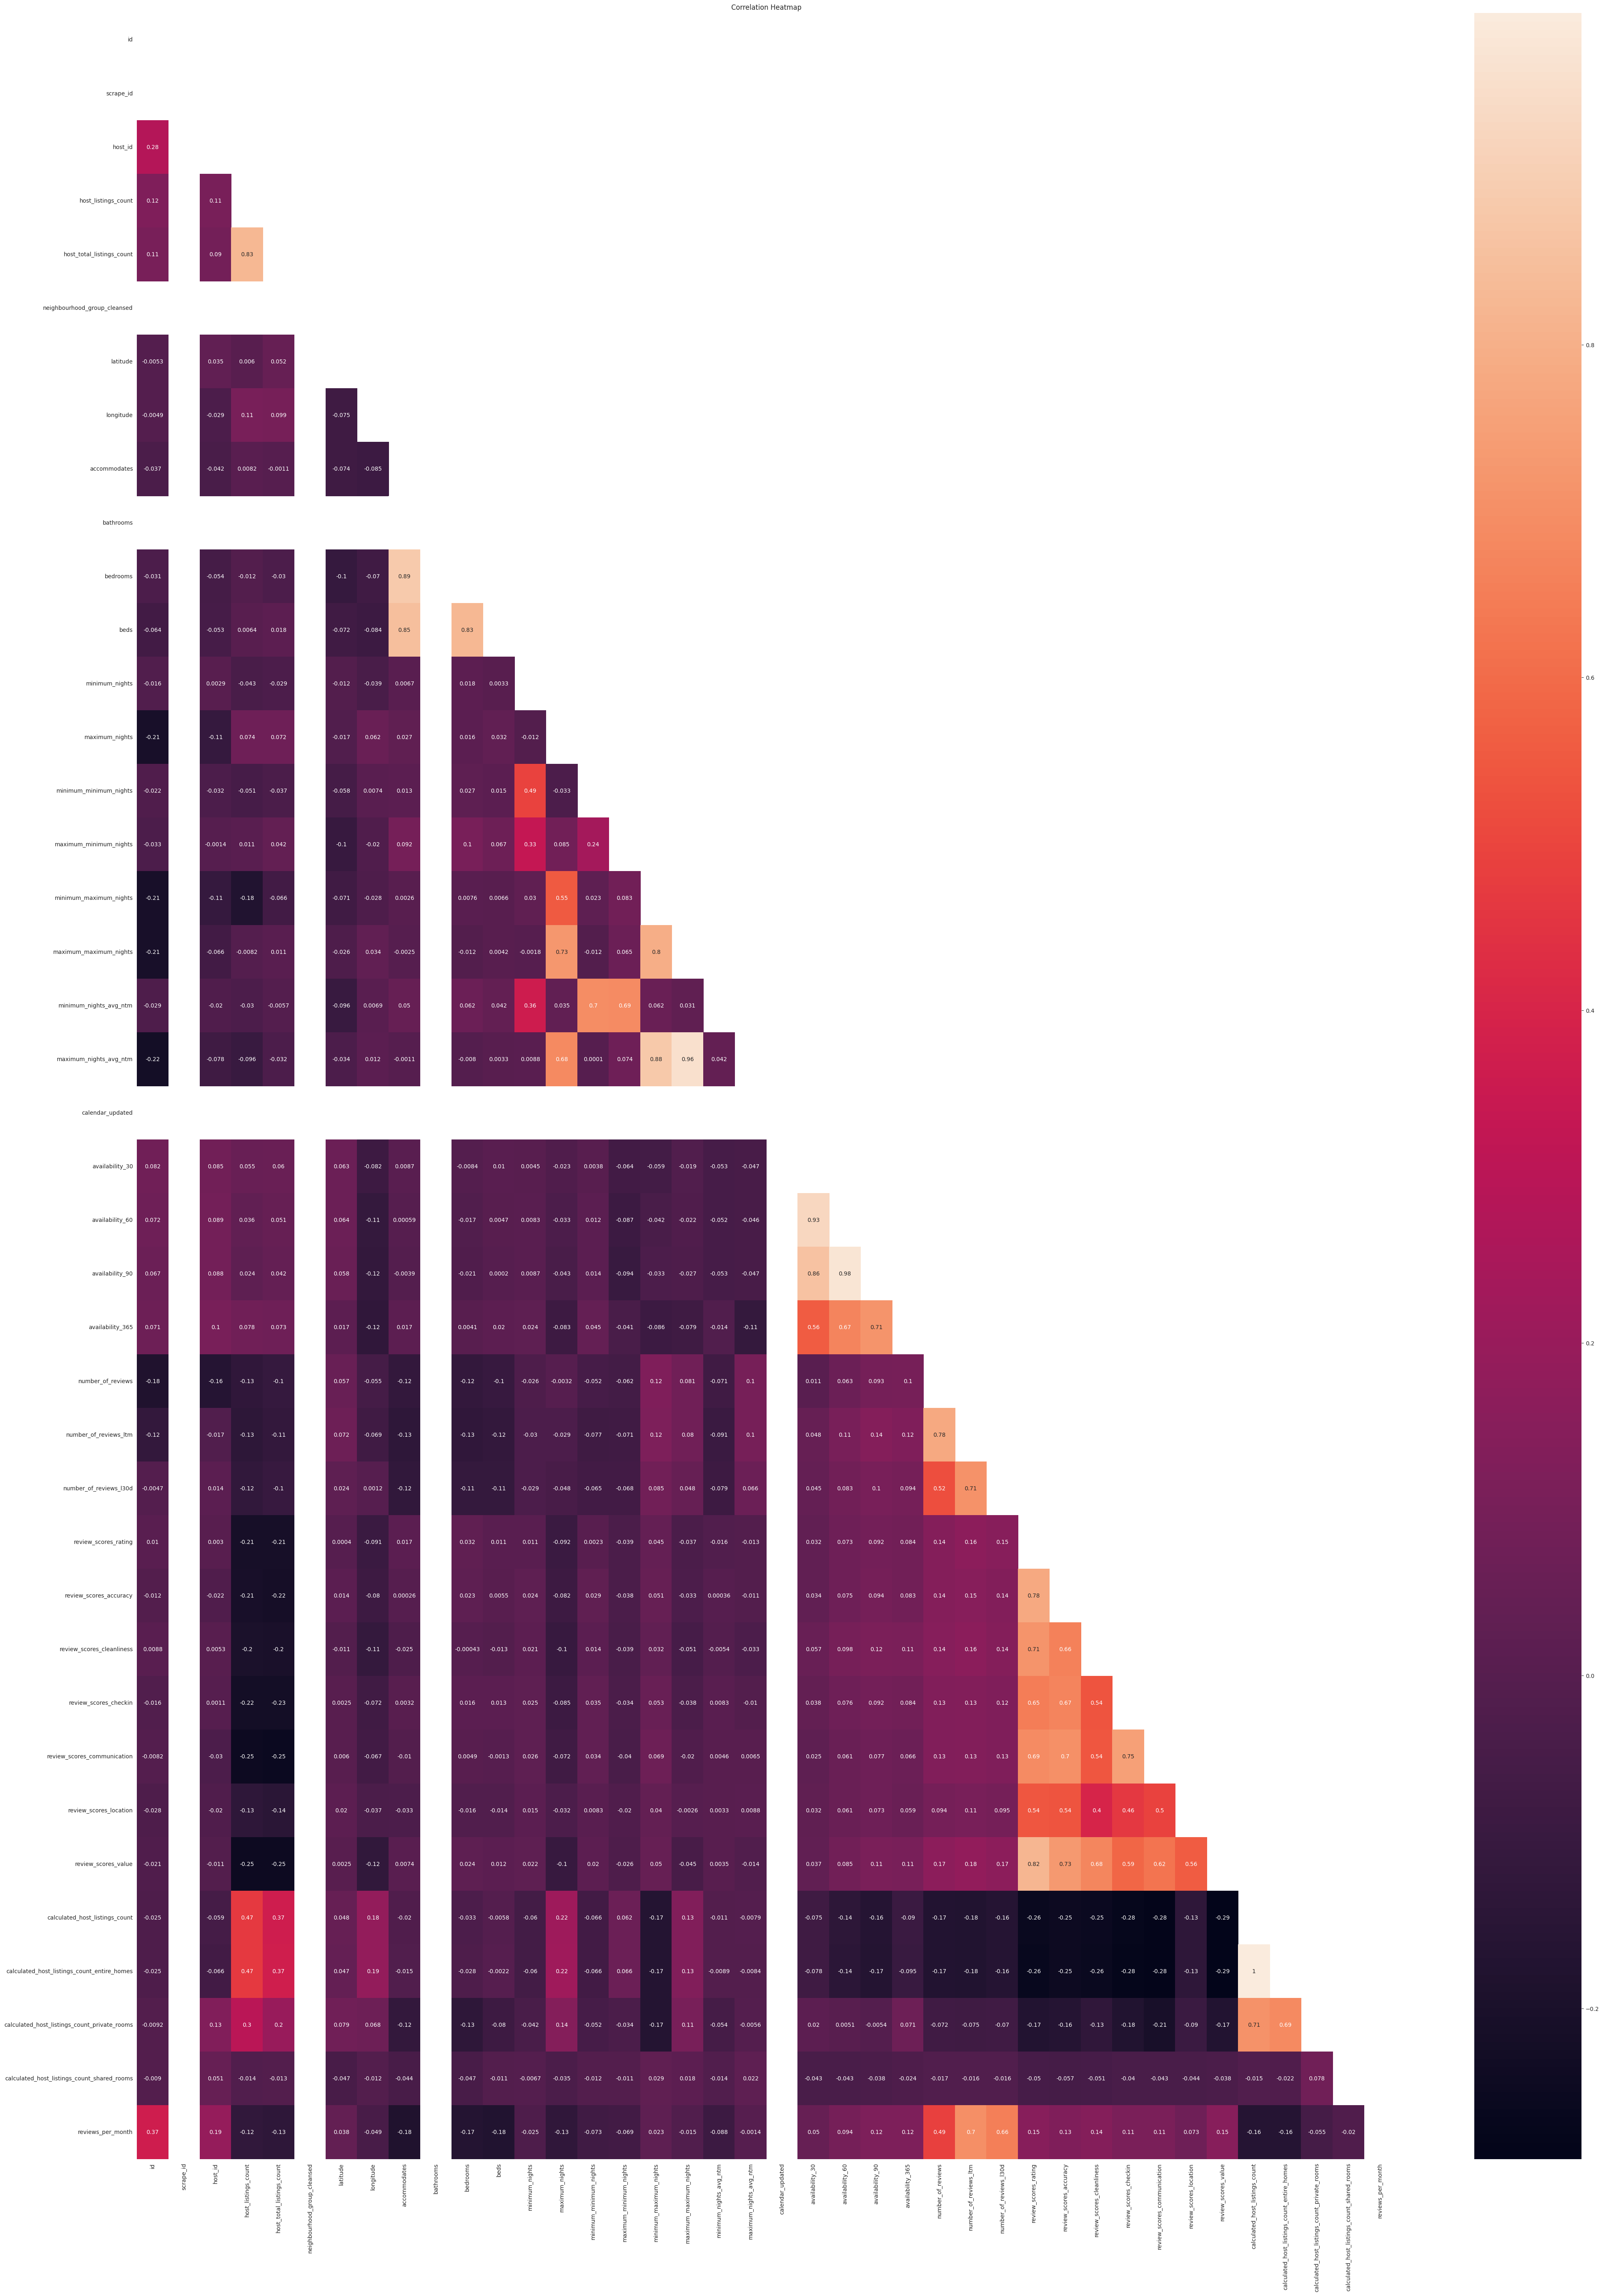

In [302]:
sns.set_style('whitegrid')

plt.figure(dpi = 100, figsize = (50,70)) #resolucion
mask = np.triu(np.ones_like(df.corr(), dtype = bool))

sns.heatmap(df.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [303]:
y=dfn

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 8.5*iqr
Limite_Inferior_iqr= percentile25 - 8.5*iqr
print("Limite superior permitido: \n", Limite_Superior_iqr)
print("Limite inferior permitido: \n", Limite_Inferior_iqr)

Limite superior permitido: 
 host_acceptance_rate            193.500
price                          1075.500
availability_365               2866.000
number_of_reviews               124.500
review_scores_rating             10.185
review_scores_cleanliness        10.695
review_scores_communication       7.805
room_type                         1.000
dtype: float64
Limite inferior permitido: 
 host_acceptance_rate             -4.500
price                          -814.500
availability_365              -2498.000
number_of_reviews              -109.500
review_scores_rating             -0.795
review_scores_cleanliness        -1.365
review_scores_communication       1.865
room_type                         1.000
dtype: float64


In [304]:
df3= dfn[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,73.0,353,52.0,4.80,4.94,4.90,NaN
1,92.0,45.0,333,9.0,4.88,4.50,5.00,NaN
2,0.0,126.0,2,11.0,4.36,4.82,4.73,1.0
3,100.0,101.0,161,26.0,4.69,4.65,4.46,1.0
4,100.0,101.0,155,15.0,4.36,4.79,4.50,1.0
...,...,...,...,...,...,...,...,...
19688,100.0,200.0,260,2.0,4.50,4.50,3.50,1.0
19689,92.0,98.0,32,0.0,4.79,4.79,4.93,1.0
19690,82.0,81.0,162,14.0,4.79,4.79,4.93,1.0
19691,99.0,105.0,271,5.0,4.20,4.20,4.20,1.0


In [305]:
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4= df4.dropna()
valores_nulos=df4.isnull().sum().sum()
valores_nulos

0

Text(0.5, 1.0, 'Correlation Heatmap')

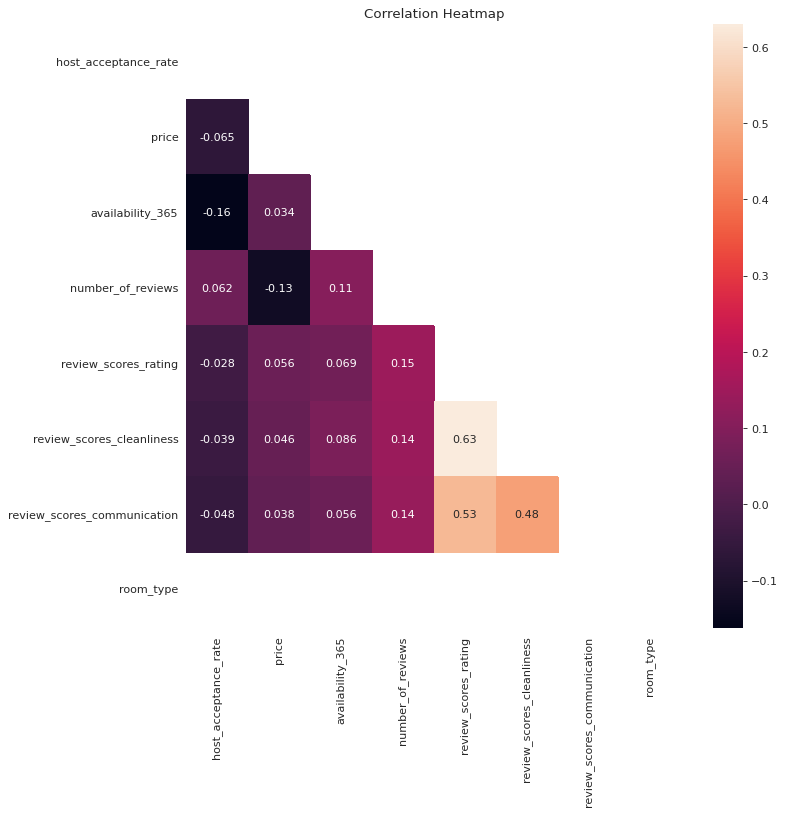

In [306]:
plt.figure(dpi = 80, figsize = (10,10)) #resolucion
mask = np.triu(np.ones_like(df4.corr(), dtype = bool))

sns.heatmap(df4.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [307]:
#Entire home = 1
entire_home = df4[df4['room_type'] == 1]
print(entire_home)
cor1 = entire_home.corr()

       host_acceptance_rate  price  availability_365  number_of_reviews  \
0                     100.0   73.0               353               52.0   
1                      92.0   45.0               333                9.0   
2                       0.0  126.0                 2               11.0   
3                     100.0  101.0               161               26.0   
4                     100.0  101.0               155               15.0   
...                     ...    ...               ...                ...   
19688                 100.0  200.0               260                2.0   
19689                  92.0   98.0                32                0.0   
19690                  82.0   81.0               162               14.0   
19691                  99.0  105.0               271                5.0   
19692                  50.0   49.0               323                0.0   

       review_scores_rating  review_scores_cleanliness  \
0                      4.80              

In [308]:
#hotel room = 2
hotel_room = df4[df4['room_type'] == 2]
print(hotel_room)
cor2 = hotel_room.corr()

Empty DataFrame
Columns: [host_acceptance_rate, price, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_communication, room_type]
Index: []


In [309]:
#private_room
private_room = df4[df4['room_type'] == 3]
print(private_room)
cor3 = private_room.corr()

Empty DataFrame
Columns: [host_acceptance_rate, price, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_communication, room_type]
Index: []


In [310]:
#shared room
shared_room= df4[df4['room_type'] == 4]
print(shared_room)
cor4 = shared_room.corr()

Empty DataFrame
Columns: [host_acceptance_rate, price, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_communication, room_type]
Index: []


##Entire home

Coeficiente de correlacion:  0.06160604299398716


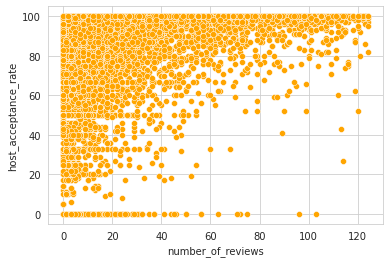

In [311]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="orange", data=entire_home)
print('Coeficiente de correlacion: ',cor1['number_of_reviews']['host_acceptance_rate'])

Coeficiente de correlacion:  0.14603873570181203


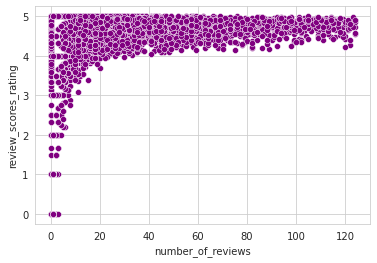

In [312]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="purple", data=entire_home)
print('Coeficiente de correlacion: ',cor1['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  -0.1253920076509424


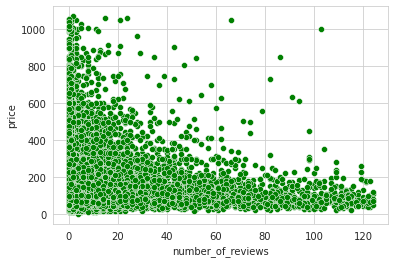

In [313]:
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=entire_home)
print('Coeficiente de correlacion: ',cor1['number_of_reviews']['price'])

Coeficiente de correlacion:  0.1417327771395373


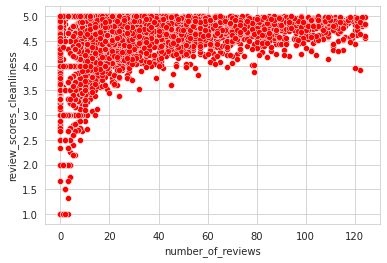

In [314]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="red", data=entire_home)
print('Coeficiente de correlacion: ',cor1['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  0.10650674378479391


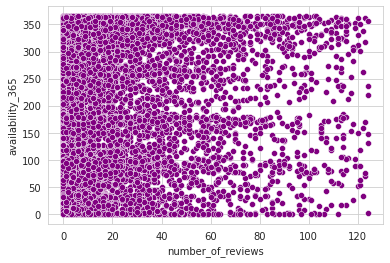

In [315]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="purple", data=entire_home)
print('Coeficiente de correlacion: ',cor1['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  0.10650674378479391


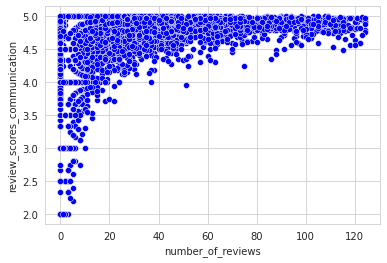

In [316]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=entire_home)
print('Coeficiente de correlacion: ',cor1['number_of_reviews']['availability_365'])

##Hotel room

Coeficiente de correlacion:  nan


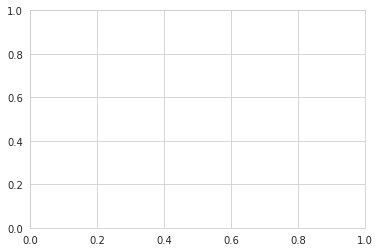

In [317]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=hotel_room)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  nan


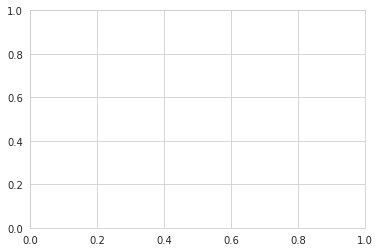

In [318]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="purple", data=hotel_room)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  nan


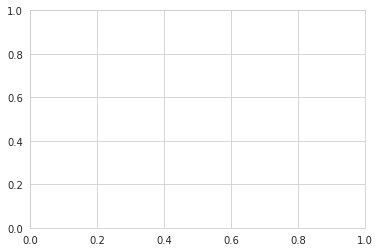

In [319]:
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=hotel_room)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['price'])

Coeficiente de correlacion:  nan


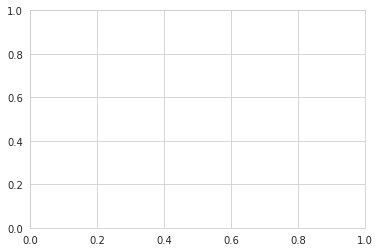

In [320]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="red", data=hotel_room)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  nan


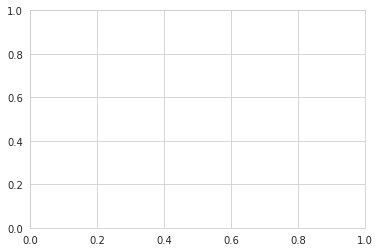

In [321]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="purple", data=hotel_room)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  nan


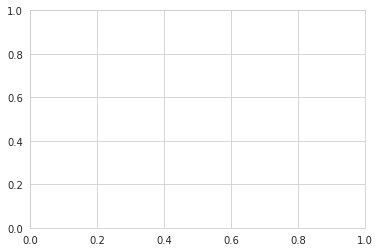

In [322]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=hotel_room)
print('Coeficiente de correlacion: ',cor2['number_of_reviews']['availability_365'])

##private_room

Coeficiente de correlacion:  nan


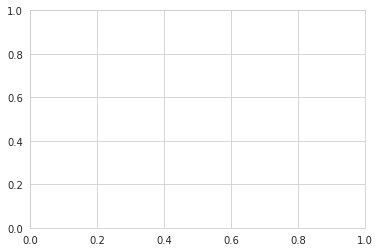

In [323]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=private_room)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  nan


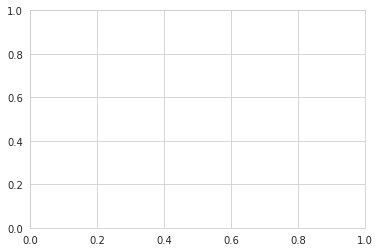

In [324]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="purple", data=private_room)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  nan


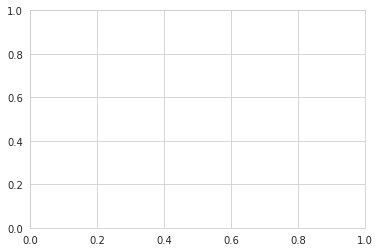

In [325]:
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=private_room)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['price'])

Coeficiente de correlacion:  nan


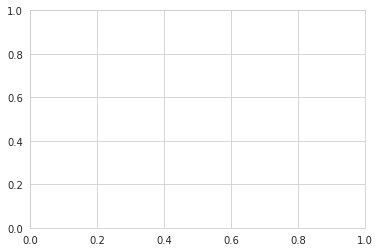

In [326]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="red", data=private_room)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  nan


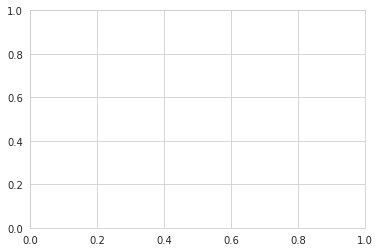

In [327]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="purple", data=private_room)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  nan


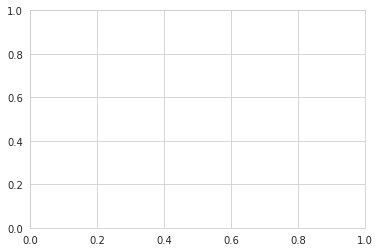

In [328]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=private_room)
print('Coeficiente de correlacion: ',cor3['number_of_reviews']['availability_365'])

##shared room

Coeficiente de correlacion:  nan


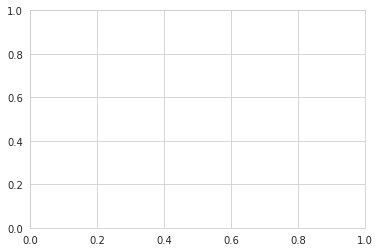

In [329]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=shared_room)
print('Coeficiente de correlacion: ',cor4['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  nan


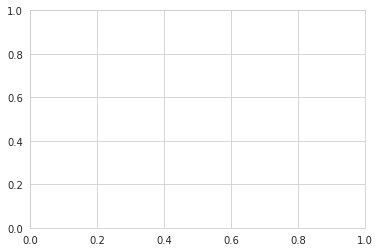

In [330]:
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', color="purple", data=shared_room)
print('Coeficiente de correlacion: ',cor4['number_of_reviews']['review_scores_rating'])

Coeficiente de correlacion:  nan


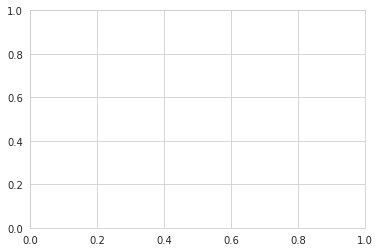

In [331]:
sns.scatterplot(x='number_of_reviews', y='price', color="green", data=shared_room)
print('Coeficiente de correlacion: ',cor4['number_of_reviews']['price'])

Coeficiente de correlacion:  nan


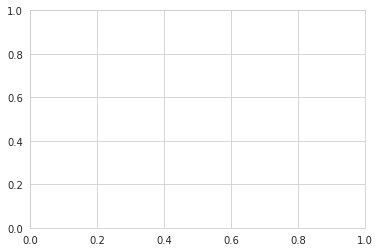

In [332]:
sns.scatterplot(x='number_of_reviews', y='review_scores_cleanliness', color="red", data=shared_room)
print('Coeficiente de correlacion: ',cor4['number_of_reviews']['review_scores_cleanliness'])

Coeficiente de correlacion:  nan


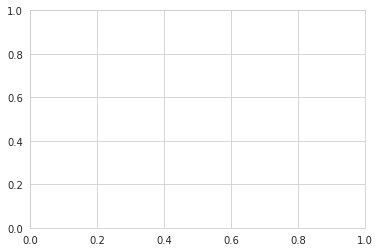

In [333]:
sns.scatterplot(x='number_of_reviews', y='availability_365', color="purple", data=shared_room)
print('Coeficiente de correlacion: ',cor4['number_of_reviews']['availability_365'])

Coeficiente de correlacion:  nan


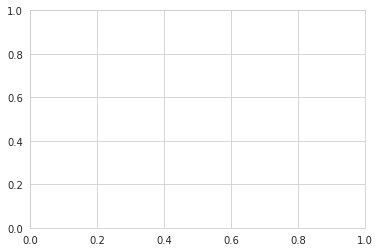

In [334]:
sns.scatterplot(x='number_of_reviews', y='review_scores_communication', color="blue", data=shared_room)
print('Coeficiente de correlacion: ',cor4['number_of_reviews']['availability_365'])

##Resumen general

In [335]:
print('Correlacion Entire Home: \n',cor1['number_of_reviews'])
print()
print('Correlacion Hotel Room: \n',cor2['number_of_reviews'])
print()
print('Correlacion Private Room: \n',cor3['number_of_reviews'])
print()
print('Correlacion Private Room: \n',cor4['number_of_reviews'])

Correlacion Entire Home: 
 host_acceptance_rate           0.061606
price                         -0.125392
availability_365               0.106507
number_of_reviews              1.000000
review_scores_rating           0.146039
review_scores_cleanliness      0.141733
review_scores_communication    0.136026
room_type                           NaN
Name: number_of_reviews, dtype: float64

Correlacion Hotel Room: 
 host_acceptance_rate          NaN
price                         NaN
availability_365              NaN
number_of_reviews             NaN
review_scores_rating          NaN
review_scores_cleanliness     NaN
review_scores_communication   NaN
room_type                     NaN
Name: number_of_reviews, dtype: float64

Correlacion Private Room: 
 host_acceptance_rate          NaN
price                         NaN
availability_365              NaN
number_of_reviews             NaN
review_scores_rating          NaN
review_scores_cleanliness     NaN
review_scores_communication   NaN
room_ty

In [336]:
Vars_Indep= df4[['number_of_reviews']]
Var_Dep= df4[['host_acceptance_rate']]

from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X=Vars_Indep, y=Var_Dep)
model.score(Vars_Indep,Var_Dep)

0.003795304533376842

In [337]:
y_pred= model.predict(X=df4[['number_of_reviews']])
y_pred

array([[91.5174684 ],
       [88.62005698],
       [88.7548203 ],
       ...,
       [88.95696528],
       [88.35053033],
       [88.01362203]])

In [341]:
df4.insert(0, 'Predicciones', y_pred)
df4.head()

,Predicciones,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,91.517468,100.0,73.0,353,52.0,4.80,4.94,4.90,1.0
1,88.620057,92.0,45.0,333,9.0,4.88,4.50,5.00,1.0
2,88.754820,0.0,126.0,2,11.0,4.36,4.82,4.73,1.0
3,89.765545,100.0,101.0,161,26.0,4.69,4.65,4.46,1.0
4,89.024347,100.0,101.0,155,15.0,4.36,4.79,4.50,1.0


Coeficiente de determinación:  0.003795304533376842
Coeficiente de correlación:  0.06160604299398592


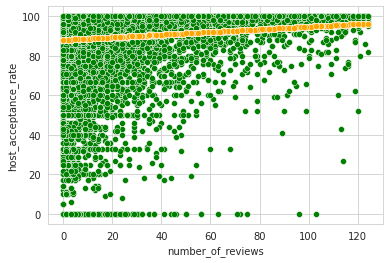

In [342]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=df4)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="orange", data=df4)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)

coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinación: ", coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

##EJERCICIO REGRESION PARA BARCELONA

In [343]:
df= pd.read_csv("barcelona.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,...,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,...,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,...,4.99,4.70,4.89,NaN,f,1,1,0,0,2.15
3,18674,https://www.airbnb.com/rooms/18674,20220910194401,2022-09-11,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.79,4.79,4.34,HUTB-002062,t,38,38,0,0,0.27
4,553559871868002337,https://www.airbnb.com/rooms/553559871868002337,20220910194401,2022-09-10,city scrape,"8 lacus, VICTORIA",8 apartaments que pretenen recordar la importà...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,442972056,...,4.50,4.40,4.80,HUTB-009880,t,8,8,0,0,1.52


In [344]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df["room_type"] = df["room_type"].str.replace("Entire home/apt","1")
df["room_type"] = df["room_type"].str.replace("Hotel room","2")
df["room_type"] = df["room_type"].str.replace("Private room","3")
df["room_type"] = df["room_type"].str.replace("Shared room","4")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,...,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,...,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,...,4.99,4.70,4.89,NaN,f,1,1,0,0,2.15
3,18674,https://www.airbnb.com/rooms/18674,20220910194401,2022-09-11,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.79,4.79,4.34,HUTB-002062,t,38,38,0,0,0.27
4,553559871868002337,https://www.airbnb.com/rooms/553559871868002337,20220910194401,2022-09-10,city scrape,"8 lacus, VICTORIA",8 apartaments que pretenen recordar la importà...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,442972056,...,4.50,4.40,4.80,HUTB-009880,t,8,8,0,0,1.52


In [345]:
df_numerica = df[['host_acceptance_rate','price','availability_365','number_of_reviews',
          'review_scores_rating','review_scores_cleanliness','review_scores_communication', 'room_type']]
df_numerica.head()

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100,59.00,351,9,4.89,5.00,4.89,3
1,100,110.00,151,54,4.83,4.70,4.98,1
2,97,86.00,218,145,4.94,4.94,4.99,1
3,93,180.00,60,30,4.38,4.72,4.79,1
4,100,110.00,106,10,4.70,4.90,4.50,1


In [346]:
df_numerica['host_acceptance_rate'] = pd.to_numeric(df_numerica['host_acceptance_rate'],errors = 'coerce')
df_numerica['price'] = pd.to_numeric(df_numerica['price'],errors = 'coerce')
df_numerica['room_type'] = pd.to_numeric(df_numerica['room_type'],errors = 'coerce')
df_numerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         14373 non-null  float64
 1   price                        16920 non-null  float64
 2   availability_365             16920 non-null  int64  
 3   number_of_reviews            16920 non-null  int64  
 4   review_scores_rating         13306 non-null  float64
 5   review_scores_cleanliness    13206 non-null  float64
 6   review_scores_communication  13207 non-null  float64
 7   room_type                    16920 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.0 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [347]:
df_round =df_numerica.fillna(round(df.mean(),1))
df_round.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,59.0,351,9,4.89,5.00,4.89,3
1,100.0,110.0,151,54,4.83,4.70,4.98,1
2,97.0,86.0,218,145,4.94,4.94,4.99,1
3,93.0,180.0,60,30,4.38,4.72,4.79,1
4,100.0,110.0,106,10,4.70,4.90,4.50,1


In [348]:
df_limpia=df_round.fillna(round(df.mean(),1))
df_limpia.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,59.0,351,9,4.89,5.00,4.89,3
1,100.0,110.0,151,54,4.83,4.70,4.98,1
2,97.0,86.0,218,145,4.94,4.94,4.99,1
3,93.0,180.0,60,30,4.38,4.72,4.79,1
4,100.0,110.0,106,10,4.70,4.90,4.50,1


Text(0.5, 1.0, 'Correlation Heatmap')

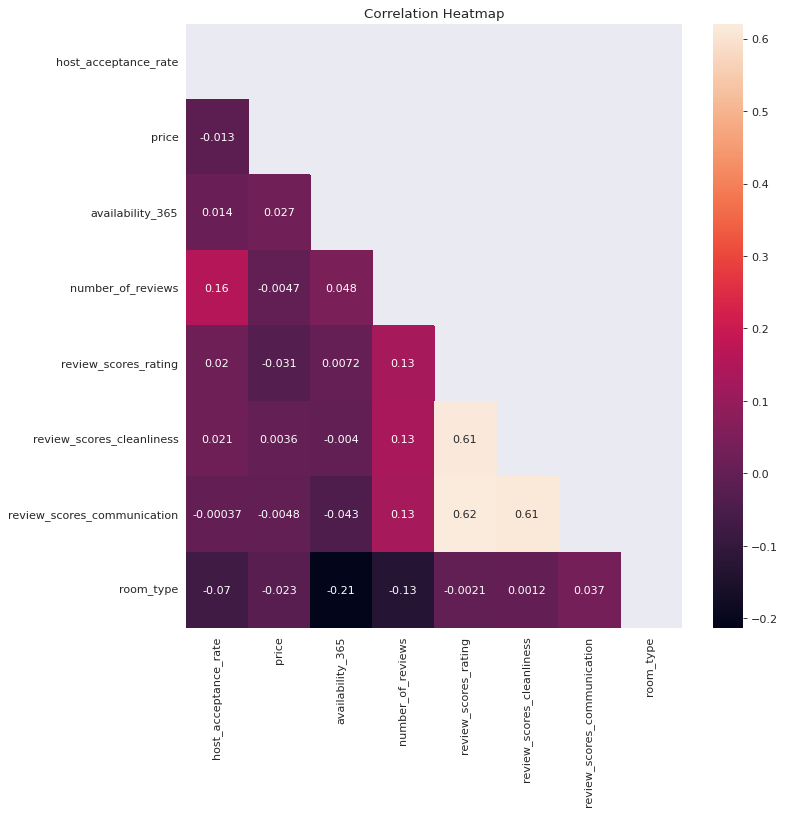

In [349]:
sns.set_style('darkgrid')

plt.figure(dpi = 80, figsize = (10,10)) #resolucion
mask = np.triu(np.ones_like(df_limpia.corr(), dtype = bool))

sns.heatmap(df_limpia.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [350]:
# Tipo de cuarto 1
cuarto1 = df_limpia[df_limpia['room_type'] == 1]
cuarto1.head()

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1,100.0,110.0,151,54,4.83,4.70,4.98,1
2,97.0,86.0,218,145,4.94,4.94,4.99,1
3,93.0,180.0,60,30,4.38,4.72,4.79,1
4,100.0,110.0,106,10,4.70,4.90,4.50,1
5,84.0,71.0,269,0,4.50,4.60,4.70,1


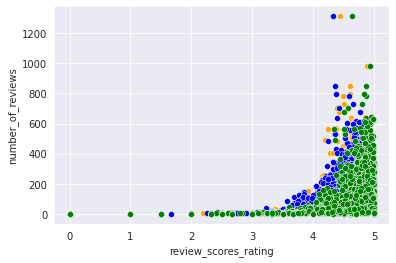

In [351]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_limpia)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="blue", data=df_limpia)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="green", data=df_limpia)

In [352]:
Vars_Indep= df_limpia[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= df_limpia['number_of_reviews']

In [353]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.score(Vars_Indep,Var_Dep)

0.023680721839130614

In [354]:
y_pred= model.predict(X=df_limpia[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred

array([50.1629104 , 47.40897364, 50.92276521, ..., 34.03018472,
       48.8190044 , 46.91459863])

In [355]:
df_limpia.insert(0, 'PM room1', y_pred)
df_limpia.head()

,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,50.162910,100.0,59.0,351,9,4.89,5.00,4.89,3
1,47.408974,100.0,110.0,151,54,4.83,4.70,4.98,1
2,50.922765,97.0,86.0,218,145,4.94,4.94,4.99,1
3,42.232057,93.0,180.0,60,30,4.38,4.72,4.79,1
4,43.665762,100.0,110.0,106,10,4.70,4.90,4.50,1


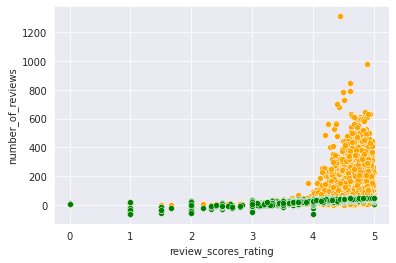

In [357]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_limpia)
sns.scatterplot(x='review_scores_rating', y='PM room1', color="green", data=df_limpia)

In [358]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.023680721839130614

In [359]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.15388541788983975

In [360]:
# Tipo de cuarto 2
cuarto2 = df_limpia[df_limpia['room_type'] == 2]
cuarto2.head()

,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
569,41.092885,98.0,220.0,70,65,4.43,4.53,4.84,2
627,46.965732,98.0,218.0,61,54,4.81,4.73,4.92,2
1556,45.483506,98.0,325.0,278,23,4.74,4.87,4.68,2
1623,45.809163,98.0,215.0,45,136,4.78,4.71,4.85,2
1652,37.098654,98.0,127.0,331,281,4.36,4.34,4.70,2


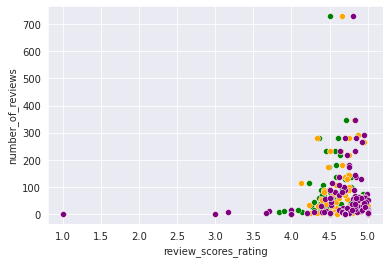

In [361]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="green", data=cuarto2)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="orange", data=cuarto2)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="purple", data=cuarto2)

In [362]:
Vars_Indep= cuarto2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= cuarto2['number_of_reviews']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [363]:
model.score(Vars_Indep,Var_Dep)
y_pred2= model.predict(X=cuarto2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred2

array([48.13976357, 41.29786844, 32.26086345, 39.54181541, 46.52724047,
       37.91953844, 40.27336237, 38.83833944, 45.71055456, 39.96313241,
       37.42050913, 46.44780227, 45.88352053, 27.20635767, 36.85117003,
       38.35285248, 40.78479159, 35.43755514, 38.43710747, 39.28816648,
       38.8633195 , 37.30372717, 39.02974279, 44.17594229, 37.44083469,
       40.27151622, 39.4289663 , 37.66982235, 42.45105117, 39.20094084,
       39.112753  , 35.34752115, 37.42050913, 37.42050913, 48.18405287,
       27.99810555, 37.38637656, 38.71918821, 38.74665782, 37.42050913,
       37.42050913, 40.80796753, 40.80796753, 40.80796753, 40.7059968 ,
       39.85541889, 43.02063082, 33.16461269, 39.00311509, 40.80796753,
       37.42050913, 40.80796753, 37.42050913, 40.80796753, 14.70635824,
       40.80796753, 36.07774509, 40.57275599, 38.80000355, 40.98422293,
       37.42050913, 39.92068926, 40.80796753, 36.83419387, 40.80796753,
       37.42050913, 45.13202092, 37.42050913, 40.80796753, 37.42

In [364]:
cuarto2.insert(0, 'PM room2', y_pred2)
cuarto2.head()

,PM room2,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
569,48.139764,41.092885,98.0,220.0,70,65,4.43,4.53,4.84,2
627,41.297868,46.965732,98.0,218.0,61,54,4.81,4.73,4.92,2
1556,32.260863,45.483506,98.0,325.0,278,23,4.74,4.87,4.68,2
1623,39.541815,45.809163,98.0,215.0,45,136,4.78,4.71,4.85,2
1652,46.527240,37.098654,98.0,127.0,331,281,4.36,4.34,4.70,2


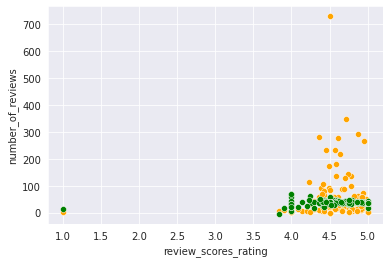

In [366]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=cuarto2)
sns.scatterplot(x='review_scores_rating', y='PM room2', color="green", data=cuarto2)

In [367]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.009751622592617082

In [368]:
#Cuarto 3
cuarto3 = df_limpia[df_limpia['room_type'] == 3]
cuarto3.head()

,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,50.162910,100.0,59.0,351,9,4.89,5.00,4.89,3
12,46.526523,61.0,39.0,231,101,4.78,4.72,4.91,3
16,40.955134,NaN,36.0,340,0,4.50,4.60,4.70,3
32,50.934173,99.0,100.0,9,58,4.97,4.91,5.00,3
33,41.930722,78.0,200.0,345,93,4.74,4.30,4.93,3


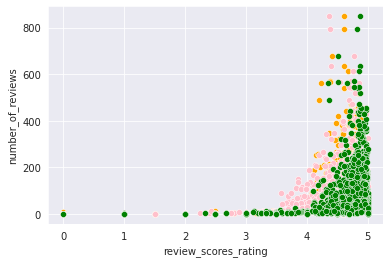

In [369]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=cuarto3)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="pink", data=cuarto3)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="green", data=cuarto3)

In [370]:
Vars_Indep= cuarto3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= cuarto3['number_of_reviews']

In [371]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [372]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [373]:
y_pred3= model.predict(X=cuarto3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred3

array([33.39761192, 30.83466018, 27.46611904, ..., 10.9919063 ,
       23.9009281 , 30.54726422])

In [374]:
cuarto3.insert(0, 'PM room3', y_pred3)
cuarto3.head()

,PM room3,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,33.397612,50.162910,100.0,59.0,351,9,4.89,5.00,4.89,3
12,30.834660,46.526523,61.0,39.0,231,101,4.78,4.72,4.91,3
16,27.466119,40.955134,NaN,36.0,340,0,4.50,4.60,4.70,3
32,33.681756,50.934173,99.0,100.0,9,58,4.97,4.91,5.00,3
33,27.758028,41.930722,78.0,200.0,345,93,4.74,4.30,4.93,3


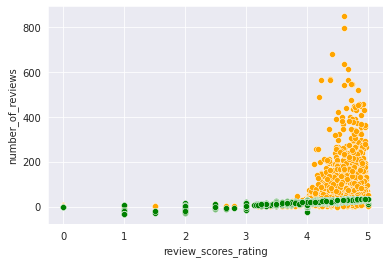

In [375]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=cuarto3)
sns.scatterplot(x='review_scores_rating', y='PM room3', color="green", data=cuarto3)

In [376]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.01631633728986559

In [377]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12773541908909053

##EJERCICIO REGRESION PARA GIRONA

In [378]:
df= pd.read_csv("girona.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14551,https://www.airbnb.com/rooms/14551,20220926182520,2022-09-26,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,...,4.90,4.60,4.74,HUTG-049542,f,1,0,1,0,0.36
1,751638,https://www.airbnb.com/rooms/751638,20220926182520,2022-09-26,city scrape,Room Limon - Casa Pati de l´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
2,41342,https://www.airbnb.com/rooms/41342,20220926182520,2022-09-27,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.10
3,751997,https://www.airbnb.com/rooms/751997,20220926182520,2022-09-26,city scrape,CAN FELIP - Penthouse (18th c.),A beautifully restored House situated in an XV...,Palafrugell dates back to the 10th C. The old ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,3387407,...,4.46,4.81,4.62,HUTG-016218,t,12,12,0,0,0.33
4,752035,https://www.airbnb.com/rooms/752035,20220926182520,2022-09-26,city scrape,CAN TARONGETA - Sunny Apartment 1-1,A beautiful Apartment on the first floor with ...,Palafrugell dates back to the 10th C. The old ...,https://a0.muscache.com/pictures/303024e1-2deb...,3387407,...,4.50,4.50,4.36,HUTG-008974,f,12,12,0,0,0.13


In [379]:
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")

df["room_type"] = df["room_type"].str.replace("Entire home/apt","1")
df["room_type"] = df["room_type"].str.replace("Hotel room","2")
df["room_type"] = df["room_type"].str.replace("Private room","3")
df["room_type"] = df["room_type"].str.replace("Shared room","4")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,14551,https://www.airbnb.com/rooms/14551,20220926182520,2022-09-26,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of Montjuïc (a mountain overloo...,Montjuïc is most likely the best neighborhood ...,https://a0.muscache.com/pictures/16209908/f1fe...,57237,...,4.90,4.60,4.74,HUTG-049542,f,1,0,1,0,0.36
1,751638,https://www.airbnb.com/rooms/751638,20220926182520,2022-09-26,city scrape,Room Limon - Casa Pati de l´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,3680160,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
2,41342,https://www.airbnb.com/rooms/41342,20220926182520,2022-09-27,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,180072,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.10
3,751997,https://www.airbnb.com/rooms/751997,20220926182520,2022-09-26,city scrape,CAN FELIP - Penthouse (18th c.),A beautifully restored House situated in an XV...,Palafrugell dates back to the 10th C. The old ...,https://a0.muscache.com/pictures/f50b37b3-1c4d...,3387407,...,4.46,4.81,4.62,HUTG-016218,t,12,12,0,0,0.33
4,752035,https://www.airbnb.com/rooms/752035,20220926182520,2022-09-26,city scrape,CAN TARONGETA - Sunny Apartment 1-1,A beautiful Apartment on the first floor with ...,Palafrugell dates back to the 10th C. The old ...,https://a0.muscache.com/pictures/303024e1-2deb...,3387407,...,4.50,4.50,4.36,HUTG-008974,f,12,12,0,0,0.13


In [380]:
df_numerica = df[['host_acceptance_rate','price','availability_365','number_of_reviews',
          'review_scores_rating','review_scores_cleanliness','review_scores_communication', 'room_type']]
df_numerica.head()

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100,73.00,353,52,4.80,4.94,4.90,3
1,92,45.00,333,9,4.88,4.50,5.00,3
2,0,126.00,2,11,4.36,4.82,4.73,1
3,100,101.00,161,26,4.69,4.65,4.46,1
4,100,101.00,155,15,4.36,4.79,4.50,1


In [381]:
df_numerica['host_acceptance_rate'] = pd.to_numeric(df_numerica['host_acceptance_rate'],errors = 'coerce')
df_numerica['price'] = pd.to_numeric(df_numerica['price'],errors = 'coerce')
df_numerica['room_type'] = pd.to_numeric(df_numerica['room_type'],errors = 'coerce')
df_numerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19693 entries, 0 to 19692
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         18623 non-null  float64
 1   price                        19693 non-null  float64
 2   availability_365             19693 non-null  int64  
 3   number_of_reviews            19693 non-null  int64  
 4   review_scores_rating         15682 non-null  float64
 5   review_scores_cleanliness    15613 non-null  float64
 6   review_scores_communication  15611 non-null  float64
 7   room_type                    19693 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.2 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [382]:
df_round =df_numerica.fillna(round(df.mean(),1))
df_round.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,73.0,353,52,4.80,4.94,4.90,3
1,92.0,45.0,333,9,4.88,4.50,5.00,3
2,0.0,126.0,2,11,4.36,4.82,4.73,1
3,100.0,101.0,161,26,4.69,4.65,4.46,1
4,100.0,101.0,155,15,4.36,4.79,4.50,1


In [383]:
df_limpia=df_round.fillna(round(df.mean(),1))
df_limpia.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,100.0,73.0,353,52,4.80,4.94,4.90,3
1,92.0,45.0,333,9,4.88,4.50,5.00,3
2,0.0,126.0,2,11,4.36,4.82,4.73,1
3,100.0,101.0,161,26,4.69,4.65,4.46,1
4,100.0,101.0,155,15,4.36,4.79,4.50,1


Text(0.5, 1.0, 'Correlation Heatmap')

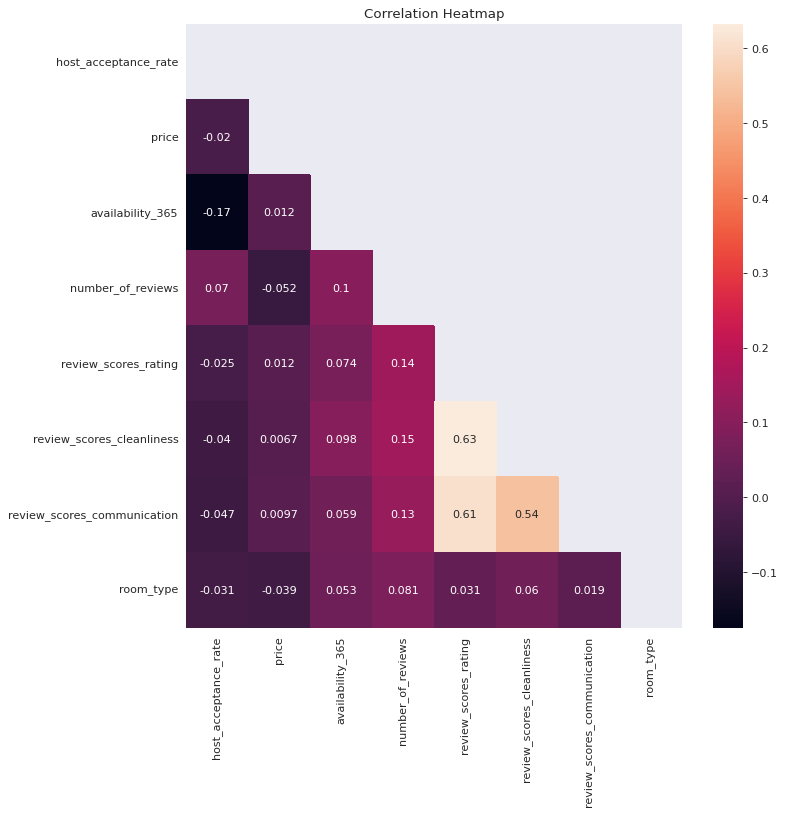

In [384]:
sns.set_style('darkgrid')

plt.figure(dpi = 80, figsize = (10,10)) #resolucion
mask = np.triu(np.ones_like(df_limpia.corr(), dtype = bool))

sns.heatmap(df_limpia.corr(), mask = mask, annot = True)
plt.title('Correlation Heatmap')

In [385]:
# Tipo de cuarto 1
cuarto1 = df_limpia[df_limpia['room_type'] == 1]
cuarto1.head()

,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
2,0.0,126.0,2,11,4.36,4.82,4.73,1
3,100.0,101.0,161,26,4.69,4.65,4.46,1
4,100.0,101.0,155,15,4.36,4.79,4.50,1
5,98.0,181.0,71,84,4.92,4.95,4.98,1
8,100.0,79.0,339,361,4.73,4.72,4.93,1


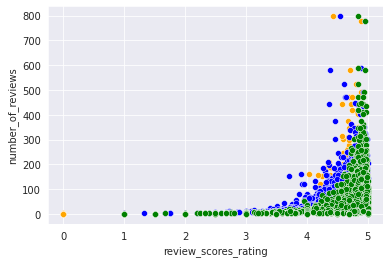

In [386]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_limpia)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="blue", data=df_limpia)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="green", data=df_limpia)

In [387]:
Vars_Indep= df_limpia[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= df_limpia['number_of_reviews']

In [388]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)
model.score(Vars_Indep,Var_Dep)

0.02735167944462169

In [389]:
y_pred= model.predict(X=df_limpia[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred

array([18.94272481, 17.35137434, 16.0519527 , ..., 18.24179935,
       10.49070203, 14.8659668 ])

In [390]:
df_limpia.insert(0, 'PM room1', y_pred)
df_limpia.head()

,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,18.942725,100.0,73.0,353,52,4.80,4.94,4.90,3
1,17.351374,92.0,45.0,333,9,4.88,4.50,5.00,3
2,16.051953,0.0,126.0,2,11,4.36,4.82,4.73,1
3,15.557795,100.0,101.0,161,26,4.69,4.65,4.46,1
4,15.124342,100.0,101.0,155,15,4.36,4.79,4.50,1


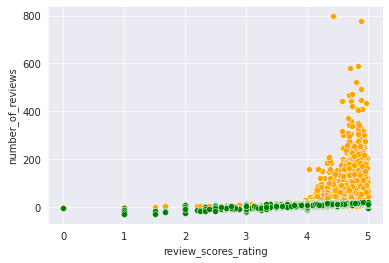

In [392]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=df_limpia)
sns.scatterplot(x='review_scores_rating', y='PM room1', color="green", data=df_limpia)

In [393]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.02735167944462169

In [394]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.16538343159041563

In [395]:
# Tipo de cuarto 2
cuarto2 = df_limpia[df_limpia['room_type'] == 2]
cuarto2.head()

,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1223,11.542915,99.0,79.0,1,12,4.25,4.17,4.50,2
1552,16.910725,100.0,309.0,362,98,4.77,4.59,4.86,2
1684,14.089874,99.0,74.0,36,10,4.30,4.50,4.70,2
1753,14.666433,99.0,48.0,0,13,4.31,4.46,4.92,2
1982,15.596976,99.0,74.0,32,27,4.41,4.56,4.93,2


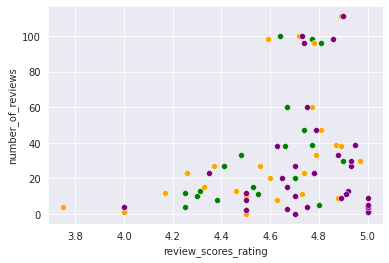

In [396]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="green", data=cuarto2)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="orange", data=cuarto2)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="purple", data=cuarto2)

In [397]:
Vars_Indep= cuarto2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= cuarto2['number_of_reviews']
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [398]:
model.score(Vars_Indep,Var_Dep)
y_pred2= model.predict(X=cuarto2[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred2

array([ 7.26898496, 19.24086455, 10.06492558,  6.98038909, 10.27978724,
       15.71592364, 13.16350863, 25.38175581,  5.10278242,  8.42843659,
        4.09242026,  2.83416132, 20.62392305, 14.33650744, 14.33650744,
       10.73721004,  6.31412381, 27.5879498 , 22.26885631, 29.06307775,
       19.78538374, 22.3234823 , 24.06380921, 23.56100502, 27.67203312,
       14.33650744, 14.33650744, 27.67203312, 26.03443266, 27.67203312,
       14.77137491, 23.3160086 , 20.81823673, 27.67203312, 20.53044814,
       15.37428529, 27.83893111, 15.97981595, 21.71492142, 23.67023985,
       23.40045126, 14.33650744, 14.33650744, 14.33650744, 14.33650744,
       14.33650744, 14.33650744, 14.33650744, 14.33650744, 14.33650744,
       14.33650744, 22.26885631])

In [399]:
cuarto2.insert(0, 'PM room2', y_pred2)
cuarto2.head()

,PM room2,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1223,7.268985,11.542915,99.0,79.0,1,12,4.25,4.17,4.50,2
1552,19.240865,16.910725,100.0,309.0,362,98,4.77,4.59,4.86,2
1684,10.064926,14.089874,99.0,74.0,36,10,4.30,4.50,4.70,2
1753,6.980389,14.666433,99.0,48.0,0,13,4.31,4.46,4.92,2
1982,10.279787,15.596976,99.0,74.0,32,27,4.41,4.56,4.93,2


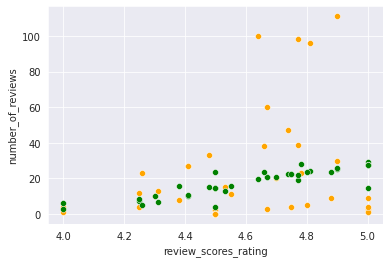

In [401]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=cuarto2)
sns.scatterplot(x='review_scores_rating', y='PM room2', color="green", data=cuarto2)

In [402]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.06207648618505235

In [403]:
#Cuarto 3
cuarto3 = df_limpia[df_limpia['room_type'] == 3]
cuarto3.head()

,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,18.942725,100.0,73.0,353,52,4.80,4.94,4.90,3
1,17.351374,92.0,45.0,333,9,4.88,4.50,5.00,3
6,16.264844,92.0,49.0,334,10,4.60,4.50,5.00,3
7,16.300793,92.0,53.0,334,11,4.70,4.55,4.82,3
9,18.507685,92.0,53.0,334,6,4.67,5.00,4.83,3


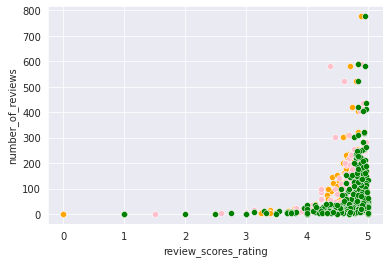

In [404]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=cuarto3)
sns.scatterplot(x='review_scores_cleanliness', y='number_of_reviews', color="pink", data=cuarto3)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="green", data=cuarto3)

In [405]:
Vars_Indep= cuarto3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']]
Var_Dep= cuarto3['number_of_reviews']

In [406]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [407]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [408]:
y_pred3= model.predict(X=cuarto3[['review_scores_rating','review_scores_communication','review_scores_cleanliness']])
y_pred3

array([31.9202605 , 27.92551262, 25.80327705, ..., 16.69791228,
       32.42510887, 28.14972766])

In [411]:
cuarto3.insert(0, 'PM room3', y_pred3)
cuarto3.head()

,PM room3,PM room1,host_acceptance_rate,price,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,31.920261,18.942725,100.0,73.0,353,52,4.80,4.94,4.90,3
1,27.925513,17.351374,92.0,45.0,333,9,4.88,4.50,5.00,3
6,25.803277,16.264844,92.0,49.0,334,10,4.60,4.50,5.00,3
7,25.963768,16.300793,92.0,53.0,334,11,4.70,4.55,4.82,3
9,31.187919,18.507685,92.0,53.0,334,6,4.67,5.00,4.83,3


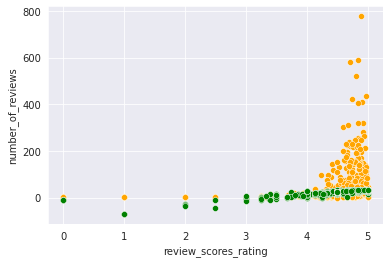

In [412]:
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="orange", data=cuarto3)
sns.scatterplot(x='review_scores_rating', y='PM room3', color="green", data=cuarto3)

In [413]:
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.024319047911160907

In [414]:
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.15594565691663526